In [56]:
from binconvfm.models.lstm import LSTMForecaster
from binconvfm.datamodules import SinDataModule
import matplotlib.pyplot as plt
from tqdm import trange
import torch

In [57]:
batch_size = 32
horizon = 50
input_len = 100
output_len = 50
datamodule = SinDataModule(batch_size, horizon, input_len, output_len)

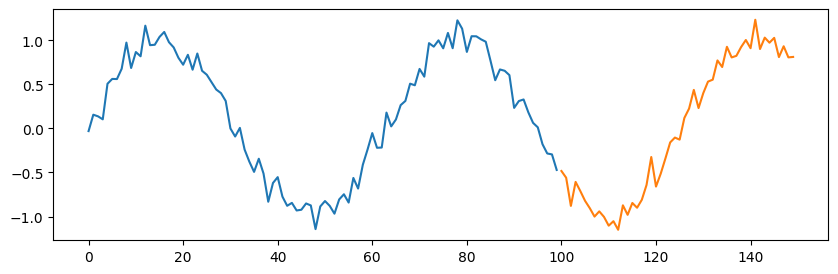

In [58]:
datamodule.setup("predict")
input_seq, target_seq = datamodule.pred_ds[0]
plt.figure(figsize=(10, 3))
plt.plot(range(0, input_len), input_seq)
plt.plot(range(input_len, input_len+horizon), target_seq)
plt.show()

In [59]:
model = LSTMForecaster(hidden_dim=64, num_epochs=5, n_samples=1000)
model.fit(datamodule)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | LSTM | 17.2 K | train
---------------------------------------
17.2 K    Trainable params
0         Non-trainable params
17.2 K    Total params
0.069     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                         | 0/? [00:00<?, ?it/s]

Training: |                                                                | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


In [60]:
model.evaluate(datamodule)

Testing: |                                                                 | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          crps              0.05573946610093117
          mase              0.8686580061912537
          nmae              0.17742495238780975
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'mase': 0.8686580061912537,
 'crps': 0.05573946610093117,
 'nmae': 0.17742495238780975}

In [61]:
pred = model.predict(datamodule, horizon=horizon)
pred[0].shape

Predicting: |                                                              | 0/? [00:00<?, ?it/s]

torch.Size([32, 1000, 50, 1])

In [62]:
idx0 = torch.randint(len(pred), (1,)).item()
idx1 = torch.randint(len(pred[idx0]), (1,)).item()
input_seq, target_seq = list(datamodule.predict_dataloader())[idx0]
input_seq, target_seq = input_seq[idx1, :], target_seq[idx1, :]
input_seq.shape, target_seq.shape

(torch.Size([100, 1]), torch.Size([50, 1]))

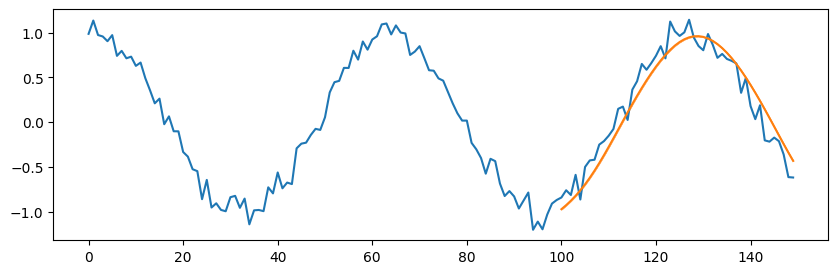

In [63]:
q = torch.tensor([0.01, 0.5, 0.99])
pred_seq = torch.quantile(pred[idx0][idx1, :, :, -1], q=q, dim=0)

plt.figure(figsize=(10, 3))
plt.plot(range(input_len + horizon), torch.concat([input_seq, target_seq]))
plt.plot(range(input_len, input_len + horizon), pred_seq[1])
plt.fill_between(range(input_len, input_len + horizon), pred_seq[0], pred_seq[2], alpha=0.5, color='tab:orange')
plt.show()